<h1 align=center> T.P : Comparaison d'un modèle kNN à des approches de regression naïves </h1>

<h2 align=center>CentraleSupélec-OpenClassrooms Certifiyng Training</h2>

<h3 align=center>Jean Martial Tagro </h3>

On reprend le jeu de données sur le vinho verde blanc qui contient des informations physico-chimiques de vins portugais (vinho verde), ainsi que leur qualité telle que notée par des humains.

Comme les étiquettes sont des nombres entiers, nous pouvons traiter la prédiction de la note de chaque vin à partir de ses caractéristiques physico-chimiques comme un problème de régression.

In [31]:
import pandas as pd
%pylab inline

from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics

Populating the interactive namespace from numpy and matplotlib


### 1. Construction d'un 11-NN

#### Obtention du dataset

In [17]:
data = pd.read_csv('winequality-white.csv', sep=";")

In [18]:
print(data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [19]:
#data.head()
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [20]:
# Extraction en 2 arrays numpy les points et étiquettes
X = data[data.columns[:-1]].values
y = data['quality'].values

#### Séparons nos données en un jeu de test et un jeu d'entraînement :

In [21]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3 ) # 30% des données dans le jeu de test

#### Standardisons les données

In [22]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

#### Entraînons un kNN avec k=11 sur ces données :

In [24]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=11)

knn.fit(X_train_std, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')

#### Et appliquons le pour prédire les étiquettes de notre jeu de test :

In [26]:
y_pred = knn.predict(X_test_std)

### 2. Evaluation : Calculons la RMSE correspondante au 11-NN

In [29]:
print("RMSE : {:.2f}".format(np.sqrt( metrics.mean_squared_error(y_test, y_pred) )))

RMSE : 0.71


J'obtiens une RMSE de 0.71. Nos étiquettes étant des nombres entiers, nous faisons en moyenne une erreur inférieure à la plus petite différence possible entre deux notes.

Nous pouvons visualiser les résultats sur un graphique, en représentant en abscisse les vraies valeurs des étiquettes, et en ordonnée les valeurs prédites.

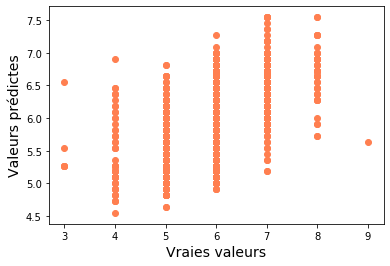

In [35]:
# Representation
plt.scatter(y_test, y_pred, color='coral')
plt.xlabel('Vraies valeurs', fontsize=14)
plt.ylabel('Valeurs prédictes', fontsize=14)
plt.show()

Comme nos étiquettes prennent des valeurs entières entre 3 et 8, nous avons beaucoup de points superposés aux même coordonnées. Pour mieux visualiser les données, <strong>nous pouvons utiliser comme marqueurs des cercles dont la taille est proportionnelle au nombre de points qui sont présents à ces coordonnées.</strong>

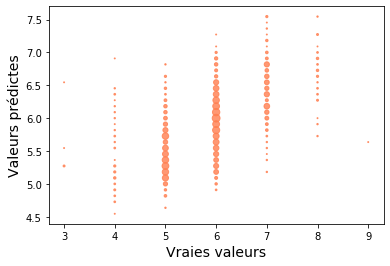

In [37]:
sizes = {} # clé : coordonnées ; valeur : nombre de points à ces coordonnées
for (yt, yp) in zip(list(y_test), list(y_pred)):
    if (yt, yp) in sizes:
        sizes[(yt, yp)] += 1
    else:
        sizes[(yt, yp)] = 1

keys = sizes.keys()
plt.scatter(
        [k[0] for k in keys], # vraie valeur (abscisse)
        [k[1] for k in keys], # valeur predite (ordonnee)
        s=[sizes[k] for k in keys], # taille du marqueur
        color='coral', alpha =0.8)

plt.xlabel('Vraies valeurs', fontsize=14)
plt.ylabel('Valeurs prédictes', fontsize=14)
plt.show()

On note ainsi une accumulation de prédictions correctes sur la diagonale. Néanmoins le modèle n'est pas très précis dans ses prédictions.

### 3. Une 1ere approche de regression naïve : prédiction aléatoire dans les proportions du jeu d'entrainement

Pour mieux comprendre notre modèle, comparons-le à une première approche naïve, qui consiste à prédire des valeurs aléatoires, distribuées uniformément entre les valeurs basse et haute des étiquettes du jeu de données d'entraînement.

In [38]:
y_pred_random = np.random.randint(np.min(y), np.max(y), y_test.shape)

#### Calculons la RMSE correspondante

In [40]:
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_random))))

RMSE : 2.00


J'obtiens une RMSE de 2, ce qui est bien supérieur à la RMSE obtenue par le modèle 11-NN. Notre modèle a ainsi réussi à bien mieux apprendre qu'un modèle aléatoire.

### 4. Une 2e approche de regression naïve : prédiction systématique de la valeur moyenne

Cependant, beaucoup de nos vins ont une note de 6, et beaucoup de nos prédictions sont autour de cette valeur. Comparons maintenant notre modèle à un modèle aléatoire qui retourne systématiquement la valeur moyenne des étiquettes du jeu de données d'entraînement.
Nous pouvons utiliser pour cela la fonction correspondante du module "dummy" de scikit-learn.

In [41]:
from sklearn import dummy
dum = dummy.DummyRegressor(strategy='mean') # on prend la moyenne des valeurs du jeu d'entrainement

# on fitte (entraine)
dum.fit(X_train_std, y_train)

# Prédiction sur le jeu de test
y_pred_dum = dum.predict(X_test_std)

# Evaluation
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dum)) ))

RMSE : 0.88


J'obtiens une RMSE de 0.88, qui est supérieure à celle de 0.71 obtenue par le kNN. 
<h3>Le kNN a donc appris plus que la moyenne des étiquettes, et bien mieux qu'un modèle aléatoire</h3>

-------